<a href="https://colab.research.google.com/github/chessterfries/Project-C117/blob/main/Project_C117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd

df = pd.read_csv("data.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [5]:
from sklearn.model_selection import train_test_split

variance = df["variance"]
Class = df["class"]

variance_train, variance_test, Class_train, Class_test = train_test_split(variance, Class, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(variance_train.ravel(), (len(variance_train), 1))
Y = np.reshape(Class_train.ravel(), (len(Class_train), 1))

classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=0)

In [7]:
X_test = np.reshape(variance_test.ravel(), (len(variance_test), 1))
Y_test = np.reshape(Class_test.ravel(), (len(Class_test), 1))

Class_test_prediction = classifier.predict(X_test)

predicted_values = []
for i in Class_test_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in Y_test.ravel():
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")

[Text(0, 0.5, 'Authorized'), Text(0, 1.5, 'Forged')]

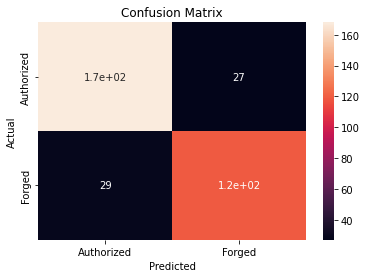

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Authorized", "Forged"]

cm = confusion_matrix(actual_values, predicted_values, labels=labels)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [18]:
accuracy = (1.2e+02 + 1.7e+02)*100/(1.2e+02 + 1.7e+02 + 29 + 27)
print("Accuracy:", accuracy)

Accuracy: 83.81502890173411
